In [1]:
import unicodedata

def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir("..")
os.chdir("Datasets")

In [3]:
BaseIndicadores = pd.read_excel("3. Base de Indicadores de Turismo.xlsx")
BaseIndicadores.head()

,TEMA,SUBTEMA,VARIABLE,CLASE,Fuente,AÑO,Mes,Valor
0,Tasa de ocupación Hotelera,Total anual,Porcentaje,NaN,Asociación Hotelera y Tuística de Colombia- CO...,2010,NaN,0.611439
1,PIB,Participación %,Porcentaje,Sector: Comercio al por mayor y al por menor; ...,Departamento Administrativo Nacional de Estadí...,2010,NaN,0.182000
2,Tasa de ocupación Hotelera,Total anual,Porcentaje,NaN,Asociación Hotelera y Tuística de Colombia- CO...,2011,NaN,0.628256
3,PIB,Participación %,Porcentaje,Sector: Comercio al por mayor y al por menor; ...,Departamento Administrativo Nacional de Estadí...,2011,NaN,0.187000
4,Tasa de ocupación Hotelera,Total anual,Porcentaje,NaN,Asociación Hotelera y Tuística de Colombia- CO...,2012,NaN,0.585851


In [4]:
BaseIndicadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TEMA      262 non-null    object 
 1   SUBTEMA   262 non-null    object 
 2   VARIABLE  262 non-null    object 
 3   CLASE     32 non-null     object 
 4   Fuente    257 non-null    object 
 5   AÑO       262 non-null    int64  
 6   Mes       214 non-null    object 
 7   Valor     262 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 16.5+ KB


In [5]:
TemaDict = {"Tasa de ocupación Hotelera":"Tasa Ocupacion Hotelera",\
    "Tasa de ocupación Airbnb":"Tasa Ocupacion Airbnb"}

ClaseDict = {"Sector: Comercio al por mayor y al por menor; reparación de vehículos automotores y motocicletas; Transporte y almacenamiento; Alojamiento y servicios de comida/ PIB Bogotá":"Sector",\
    "Subsector: Alojamiento y servicio de comida/ PIB Bogotá":"Subsector",\
    "Turistas Internacionales":"Turistas Internal", "Turistas Nacionales":"Turistas Nal"}

MonthDict = {1:"Enero", 2:"Febrero", 3:"Marzo", 4:"Abril",\
    5:"Mayo", 6:"Junio", 7:"Julio", 8:"Agosto",\
    9:"Septiembre", 10:"Octubre", 11:"Noviembre",
    12:"Diciembre"}

FuenteDict = {"Asociación Hotelera y Tuística de Colombia- COTELCO, Sistema de Información Turística- SIH":"COTELCO",
    "Departamento Administrativo Nacional de Estadística- DANE, Cuentas Nacionales":"DANE",
    "Investigación Viajeros en Bogotá":"Investigacion Viajeros Bogota"}

CurrencyDict = {"Porcentaje":"Porcentaje","Gasto (millones de dolares)":"USD M", "Gasto (dolares)":"USD"}

BaseIndicadores = BaseIndicadores.replace(to_replace={"TEMA":TemaDict})
BaseIndicadores["SUBTEMA"] = BaseIndicadores.SUBTEMA.str.replace("%","").str.strip()
BaseIndicadores["SUBTEMA"] = BaseIndicadores.SUBTEMA.apply(lambda ele: remove_accents(ele))
BaseIndicadores["VARIABLE"] = BaseIndicadores.VARIABLE.map(CurrencyDict)
BaseIndicadores["CLASE"] = BaseIndicadores.CLASE.map(ClaseDict)
BaseIndicadores["Fuente"] = BaseIndicadores.Fuente.map(FuenteDict)
BaseIndicadores = BaseIndicadores.replace(to_replace={"Mes":MonthDict})

BaseIndicadores.fillna("Indefinido",inplace=True)

BaseIndicadores["Mes"] = BaseIndicadores.Mes.astype("category")
MonthsOrdered = ["Enero", "Febrero", "Marzo", "Abril",\
    "Mayo", "Junio", "Julio", "Agosto",\
    "Septiembre", "Octubre", "Noviembre",\
    "Diciembre", "Indefinido"]
BaseIndicadores["Mes"] = BaseIndicadores.Mes.cat.reorder_categories(MonthsOrdered, ordered=True)

In [6]:
BaseIndicadores

,TEMA,SUBTEMA,VARIABLE,CLASE,Fuente,AÑO,Mes,Valor
0,Tasa Ocupacion Hotelera,Total anual,Porcentaje,Indefinido,COTELCO,2010,Indefinido,0.611439
1,PIB,Participacion,Porcentaje,Sector,DANE,2010,Indefinido,0.182000
2,Tasa Ocupacion Hotelera,Total anual,Porcentaje,Indefinido,COTELCO,2011,Indefinido,0.628256
3,PIB,Participacion,Porcentaje,Sector,DANE,2011,Indefinido,0.187000
4,Tasa Ocupacion Hotelera,Total anual,Porcentaje,Indefinido,COTELCO,2012,Indefinido,0.585851
...,...,...,...,...,...,...,...,...
257,Gasto Turistico,Per capita diario,USD,Turistas Internal,Investigacion Viajeros Bogota,2019,Indefinido,103.000000
258,Gasto Turistico,Total ingresos para Bogota,USD M,Turistas Nal,Investigacion Viajeros Bogota,2019,Indefinido,1523.000000
259,Gasto Turistico,Per capita diario,USD,Turistas Nal,Investigacion Viajeros Bogota,2019,Indefinido,47.000000
260,Gasto Turistico,Total ingresos para Bogota,USD M,Turistas Internal,Investigacion Viajeros Bogota,2020,Indefinido,280.000000


In [7]:
BaseIndicadores.set_index("AÑO",inplace=True)
StatsPerYear = BaseIndicadores.sort_values(by="AÑO").groupby(["AÑO","TEMA","SUBTEMA","VARIABLE","CLASE"])\
    .describe().round(2)

In [8]:
BaseIndicadores

,TEMA,SUBTEMA,VARIABLE,CLASE,Fuente,Mes,Valor
AÑO,,,,,,,
2010,Tasa Ocupacion Hotelera,Total anual,Porcentaje,Indefinido,COTELCO,Indefinido,0.611439
2010,PIB,Participacion,Porcentaje,Sector,DANE,Indefinido,0.182000
2011,Tasa Ocupacion Hotelera,Total anual,Porcentaje,Indefinido,COTELCO,Indefinido,0.628256
2011,PIB,Participacion,Porcentaje,Sector,DANE,Indefinido,0.187000
2012,Tasa Ocupacion Hotelera,Total anual,Porcentaje,Indefinido,COTELCO,Indefinido,0.585851
...,...,...,...,...,...,...,...
2019,Gasto Turistico,Per capita diario,USD,Turistas Internal,Investigacion Viajeros Bogota,Indefinido,103.000000
2019,Gasto Turistico,Total ingresos para Bogota,USD M,Turistas Nal,Investigacion Viajeros Bogota,Indefinido,1523.000000
2019,Gasto Turistico,Per capita diario,USD,Turistas Nal,Investigacion Viajeros Bogota,Indefinido,47.000000


In [9]:
idx = pd.IndexSlice

PIB = StatsPerYear.loc[idx[:,"PIB",:,:,:]]["Valor"]
HotelsStats = StatsPerYear.loc[idx[:,"Tasa Ocupacion Hotelera",:,:,:]]["Valor"]
AirbnbStats = StatsPerYear.loc[idx[:,"Tasa Ocupacion Airbnb",:,:,:]]["Valor"]
GastoTuristico = StatsPerYear.loc[idx[:,"Gasto Turistico",:,:,:]]["Valor"]

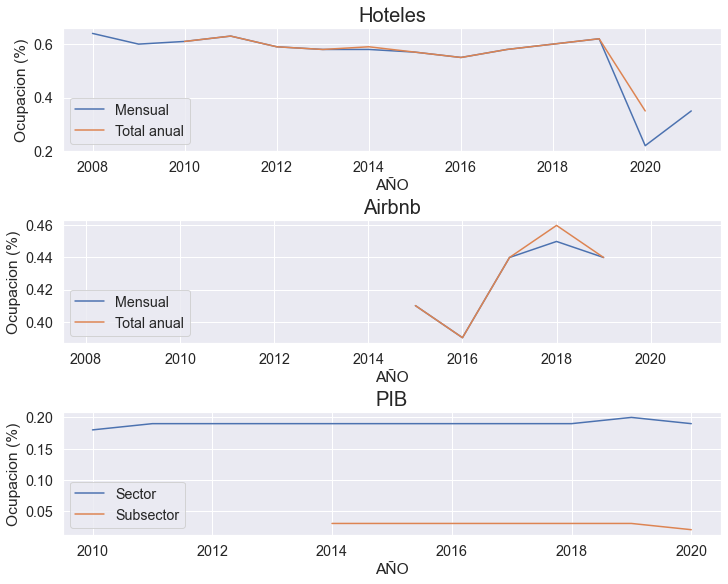

In [10]:
sns.set(font_scale=1.3)

fig, axs = plt.subplots(3,1,figsize=(10,8),constrained_layout=True)

sns.lineplot(data=HotelsStats,x="AÑO",y="mean",hue="SUBTEMA",markers=True,ax=axs[0])
sns.lineplot(data=AirbnbStats,x="AÑO",y="mean",hue="SUBTEMA",markers=True,ax=axs[1])
sns.lineplot(data=PIB,x="AÑO",y="mean",hue="CLASE",markers=False,ax=axs[2])

axs[0].set_title("Hoteles",fontsize=20)
axs[1].set_title("Airbnb",fontsize=20)
axs[2].set_title("PIB",fontsize=20)
axs[1].set_xlim(2007.5,2021.5)

for ax in axs:
    ax.set_ylabel("Ocupacion (%)")
    ax.legend(loc="lower left")
    # if ax == axs[2]:
    #     ax.legend().remove()
#     ax.xaxis.label.set_size(15)
#     ax.yaxis.label.set_size(15)
#     ax.tick_params(axis='both', labelsize=14)

Text(0.5, 0.98, 'Gasto Turístico Por Año')

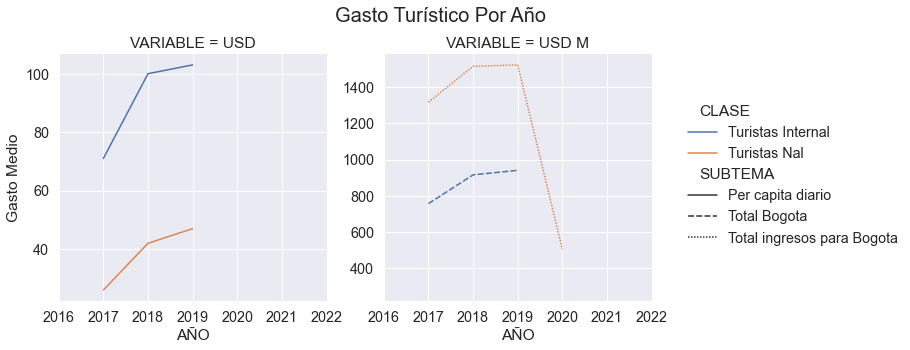

In [11]:

PlotsGastos = sns.relplot(
    data=GastoTuristico, x="AÑO", y="mean",
    col="VARIABLE", hue="CLASE", style="SUBTEMA",
    facet_kws= {"sharey":False,"margin_titles":True}, kind="line"
)

PlotsGastos.set(xlim=(2016, 2022))
PlotsGastos.axes[0,0].set(ylabel="Gasto Medio")
PlotsGastos.fig.subplots_adjust(top=0.85)
PlotsGastos.fig.suptitle("Gasto Turístico Por Año",fontsize=20)